# Imports

In [1]:
from PME import PME1DBB
import numpy as np
import matplotlib.pyplot as plt

from ngsolve import *
%matplotlib widget

plt.rc("font",size=16, family="serif")

# $\alpha = 2$

Solve.

In [2]:
P22 = PME1DBB(sc= .05, alpha=2, beta=0.5, nx=32, ny = 32, order=4, xmax=4, maxIter=5000, printNum=100)
P22.solve()

Iteration: 5000 PDHG error: 4.12124898e-06 spacetime error: 2.20084363e-03 terminal error 1.77622938e-03



Generate and plot snapshots.

0.008678980525371714 1.3337488152240535 3.9913210194746283


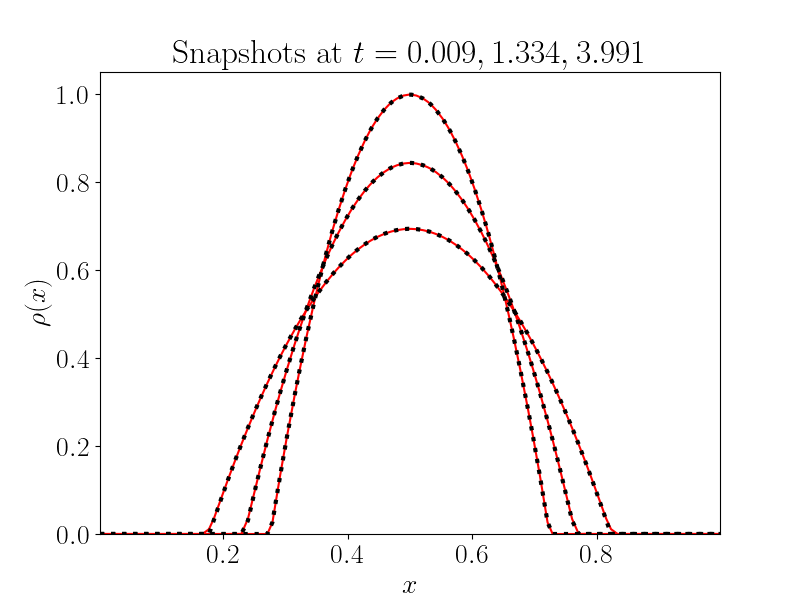

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc("text", usetex=True)
plt.rc("font",size=20, family="serif")
fig, ax = plt.subplots(figsize = (8,6))
P22.snapshots(fig, ax)
plt.rc("text", usetex=False)
plt.rc("font",size=12, family="serif")

Generate and save animated plots.

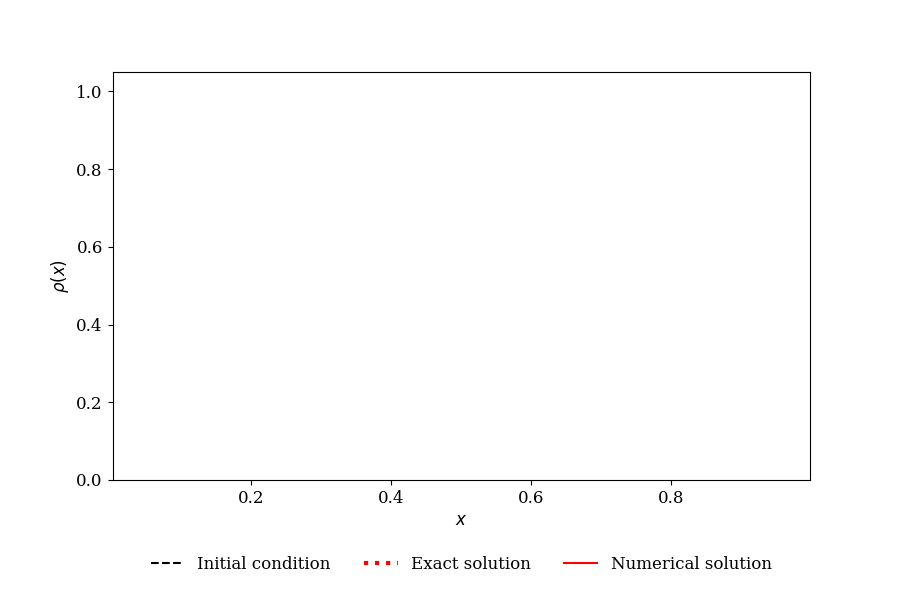

In [ ]:
fig, ax = plt.subplots(figsize = (9,6))
P22.animate(fig, ax)

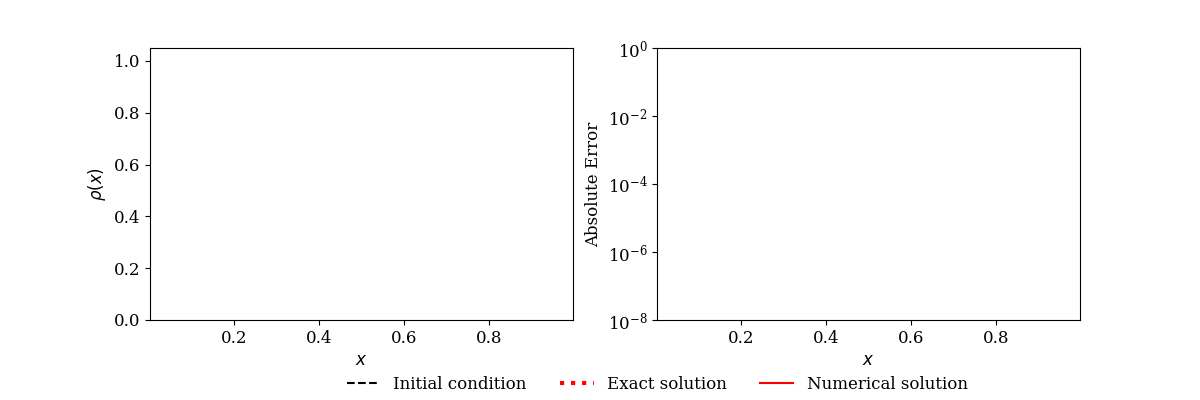

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4),)
P22.animateWithErr(fig, ax, color='r')

Error vs iteration count plots.

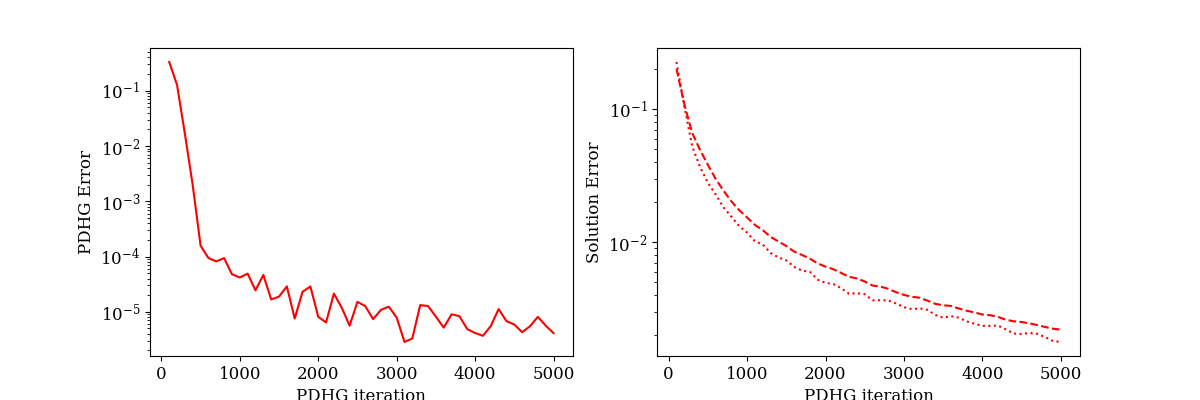

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4),)
P22.plotErr(ax,'','red')
plt.show()

# $\alpha = 3$

Solve.

In [6]:
P3 = PME1DBB(sc= .1, alpha=3, beta=.5, nx=32, ny=32, order=5, xmax=4, maxIter=5000, printNum=100)
P3.solve()

Iteration: 5000 PDHG error: 1.09459340e-05 spacetime error: 1.24670092e-02 terminal error 2.88717222e-03



Generate and plot snapshots.

0.005863759628833502 1.3461543318816052 3.9941362403711667


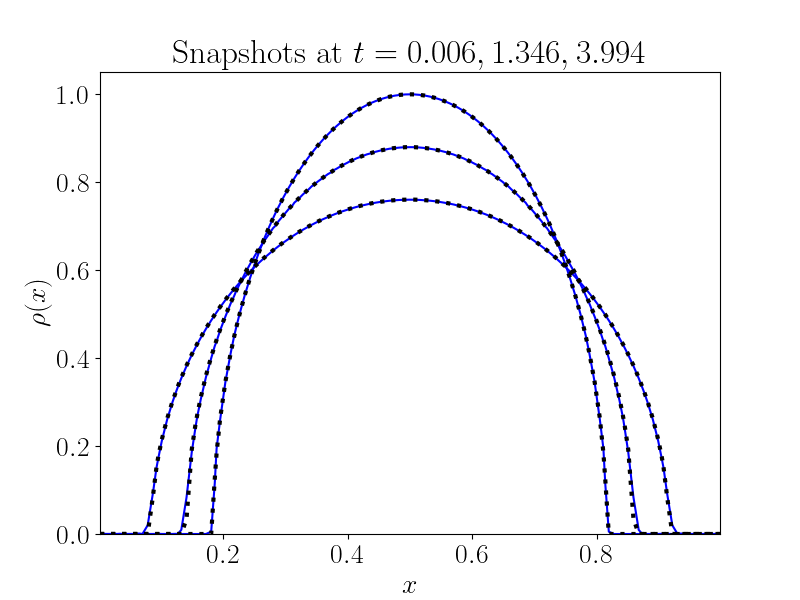

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc("text", usetex=True)
plt.rc("font",size=20, family="serif")
fig, ax = plt.subplots(figsize = (8,6))
P3.snapshots(fig, ax, color='b')
plt.rc("text", usetex=False)
plt.rc("font",size=12, family="serif")

Generate and save animated plots.

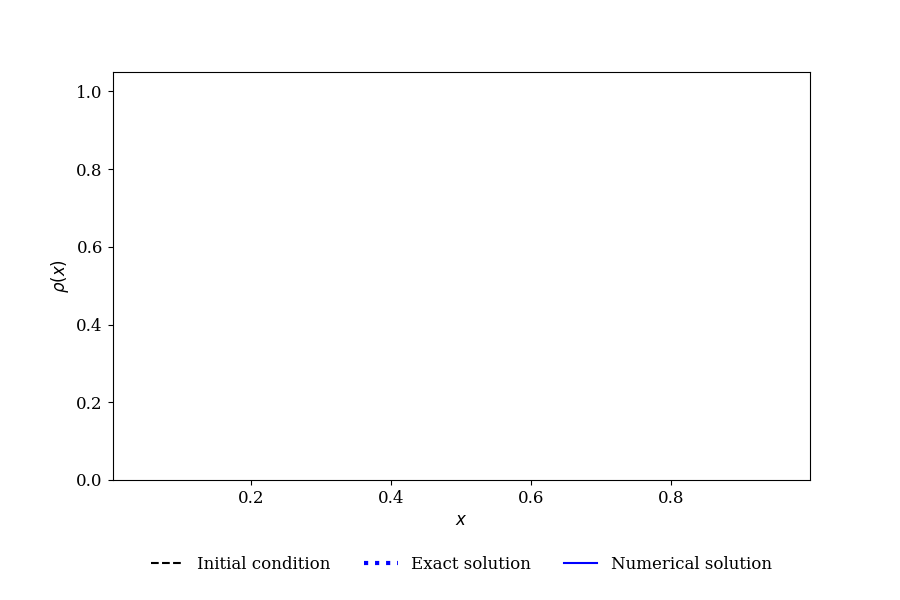

In [ ]:
fig, ax = plt.subplots(figsize = (9,6))
P3.animate(fig, ax, color='b')

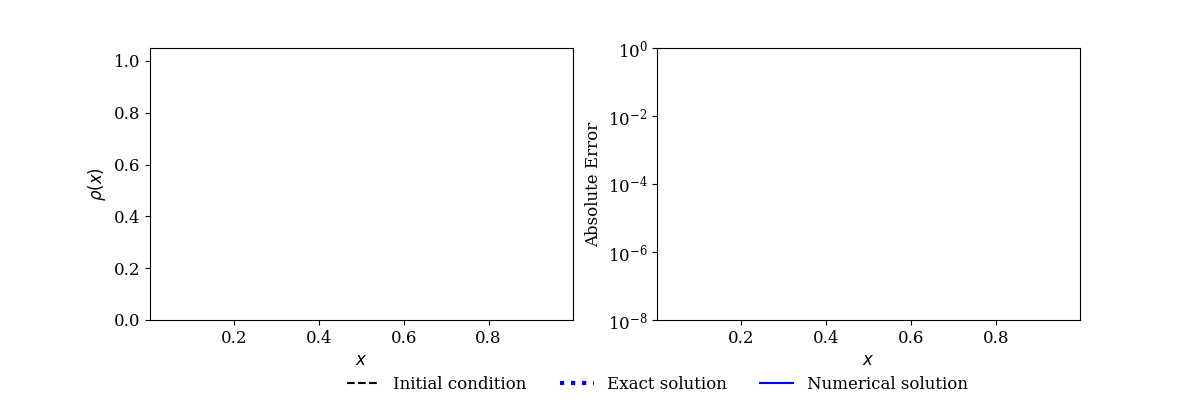

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4),)
P3.animateWithErr(fig, ax, color='b')

Error vs iteration count plots.

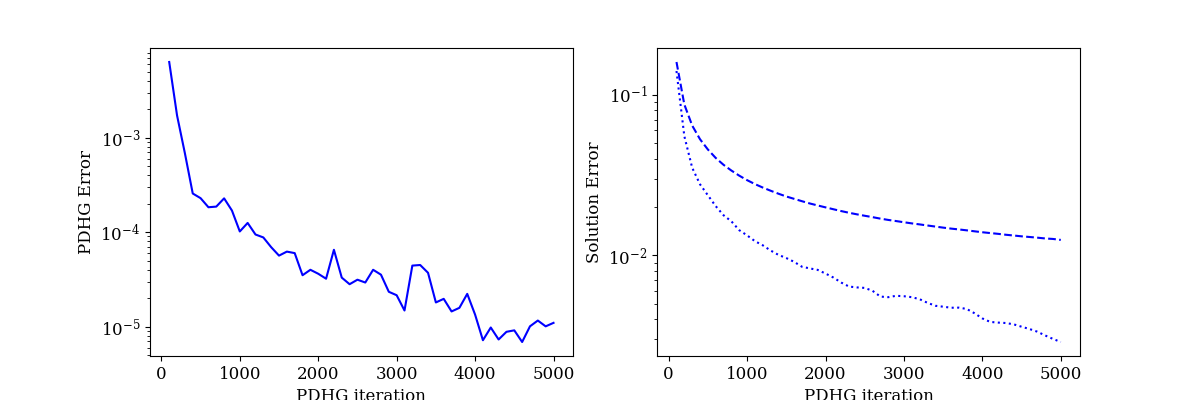

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4),)
P3.plotErr(ax,'','blue')
plt.show()

# Error plots for $\alpha$ values together

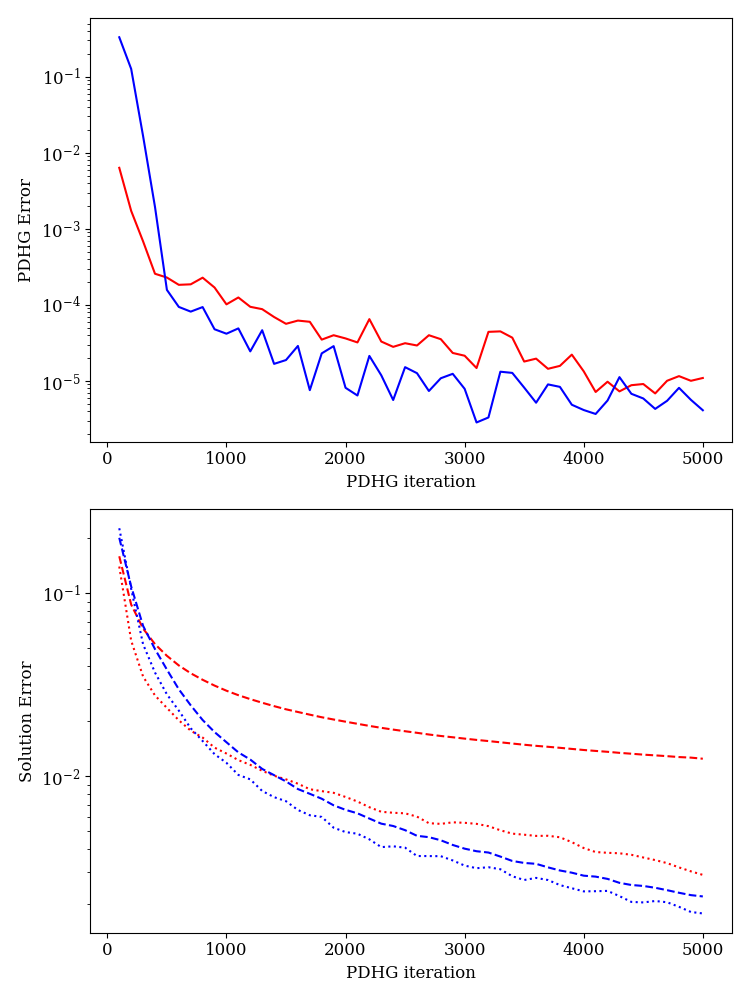

In [ ]:
fig, axs = plt.subplots(2, 1, figsize = (7.5, 10))
P3.plotErr(axs, 'alpha = 3','red',)
P22.plotErr(axs, 'alpha = 2', 'blue')
plt.tight_layout()
plt.show()
fig.savefig("Errors_alpha2_alpha3" + ".pdf", dpi=300,bbox_inches='tight',pad_inches=.02)


In [80]:
def plotErr(self, axs, label, color):
        x_ = [i*self.printNum for i in range(1,len(self.pdhgErr)+1)]
        for ax in axs:
            ax.set_xlabel("PDHG iteration")
        axs[0].set_ylabel("PDHG Error")
        axs[1].set_ylabel(r"Solution Error")
        axs[0].semilogy(x_, self.pdhgErr, "-", label = label, color = color)
        axs[1].semilogy(x_, self.stErr, "--", label = label, color = color)
        axs[1].semilogy(x_, self.terminalErr, ":", label = label, color = color)